## Binary Classification on Images

1. CNN ?
2. Convolution Filters, MaxPooling, EdgeDetection ?

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_path = 'data/train/'
test_path = 'data/test/'

train_dataset = train.flow_from_directory(train_path,
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(test_path,
                                        target_size=(150,150),
                                        batch_size =32,
                                        class_mode = 'binary')

C:\Users\Hari\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 7998 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [4]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [5]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

In [6]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_dataset,
         steps_per_epoch = 250,
         epochs = 10,
         validation_data = test_dataset
         )

C:\Users\Hari\AppData\Local\Temp\ipykernel_368\3270835153.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_dataset,


Epoch 1/10
250/250 [==============================] - 130s 516ms/step - loss: 0.6944 - accuracy: 0.5163 - val_loss: 0.6767 - val_accuracy: 0.5770
Epoch 2/10
250/250 [==============================] - 102s 406ms/step - loss: 0.6630 - accuracy: 0.5794 - val_loss: 0.6431 - val_accuracy: 0.6073
Epoch 3/10
250/250 [==============================] - 109s 437ms/step - loss: 0.6084 - accuracy: 0.6612 - val_loss: 0.5765 - val_accuracy: 0.6983
Epoch 4/10
250/250 [==============================] - 110s 440ms/step - loss: 0.5516 - accuracy: 0.7121 - val_loss: 0.5139 - val_accuracy: 0.7520
Epoch 5/10
250/250 [==============================] - 108s 432ms/step - loss: 0.4896 - accuracy: 0.7607 - val_loss: 0.4792 - val_accuracy: 0.7677
Epoch 6/10
250/250 [==============================] - 108s 432ms/step - loss: 0.4548 - accuracy: 0.7842 - val_loss: 0.4563 - val_accuracy: 0.7860
Epoch 7/10
250/250 [==============================] - 110s 439ms/step - loss: 0.3944 - accuracy: 0.8232 - val_loss: 0.4218 -

In [17]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("DOG",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("CAT",fontsize=30)
    plt.show()

1/1 [==============================] - 0s 167ms/step
[[0.]]


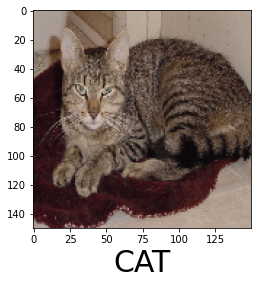

In [9]:
predictImage('data/predict/cat/5001.jpg')

1/1 [==============================] - 0s 35ms/step
[[1.]]


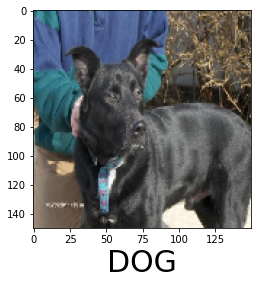

In [10]:
predictImage('data/predict/dog/5002.jpg')

1/1 [==============================] - 0s 41ms/step
[[1.]]


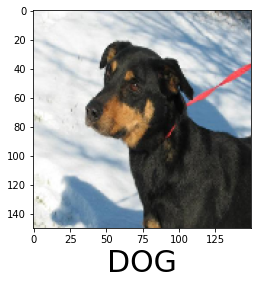

1/1 [==============================] - 0s 39ms/step
[[0.999978]]


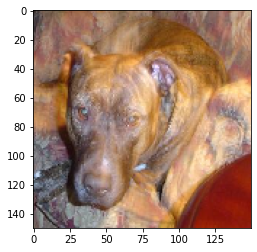

1/1 [==============================] - 0s 32ms/step
[[1.]]


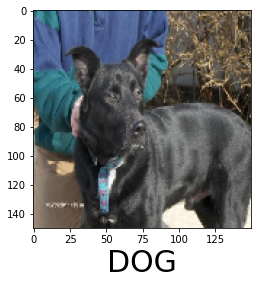

1/1 [==============================] - 0s 29ms/step
[[1.]]


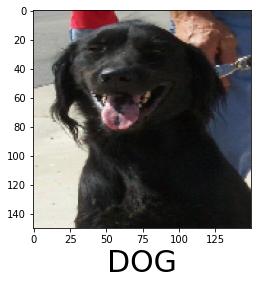

1/1 [==============================] - 0s 45ms/step
[[1.7453204e-30]]


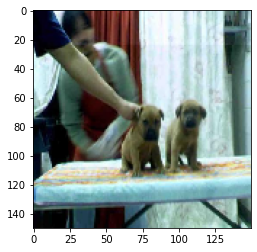

1/1 [==============================] - 0s 35ms/step
[[1.]]


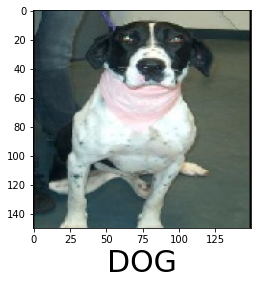

1/1 [==============================] - 0s 41ms/step
[[1.]]


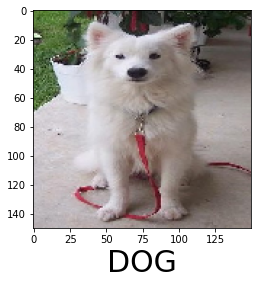

1/1 [==============================] - 0s 33ms/step
[[1.]]


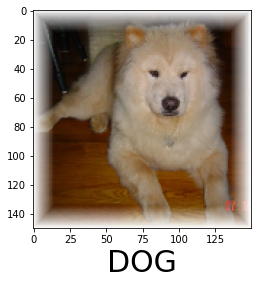

1/1 [==============================] - 0s 33ms/step
[[0.]]


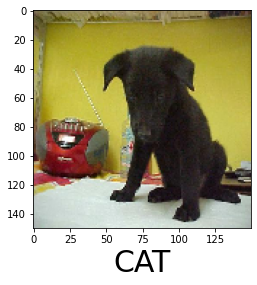

1/1 [==============================] - 0s 34ms/step
[[1.]]


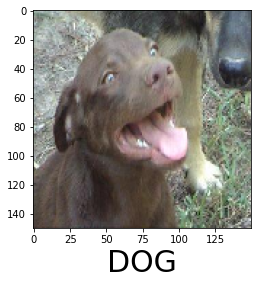

In [18]:
dir_path = 'data/predict/dog/'
for i in os.listdir(dir_path):
    if i.endswith('.jpg'):
        file = os.path.join(dir_path,i)
        predictImage(file)